In [4]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6
rcParams.update({'figure.max_open_warning': 0, 'font.size': 14, 'axes.titlesize': 14,
                 'axes.labelsize': 14, 'axes.grid':True, 'xtick.direction': 'in', 'ytick.direction': 'in',
                 'ytick.right': True, 'xtick.top':True, 'ytick.major.size': 10, 'xtick.major.size': 10,
                 'legend.fancybox': True, 'legend.markerscale': 0.8, 'legend.handlelength': 5.0})

mpl.rcParams['grid.linestyle'] = '-.'



In [59]:
pkl_file = open('../2020-03-25_22-08-20.pkl.gz', 'rb')
mydata = pickle.load(pkl_file)
mydata.keys()
pkl_file = open('/eos/user/f/fdolek/SWAN_projects/pods/2020-03-29_15-48-35.pkl.gz', 'rb')
mydata1 = pickle.load(pkl_file)
mydata1.keys()


dict_keys(['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7'])

In [14]:
mydata['Ch4'].shape   

(10000, 2000)

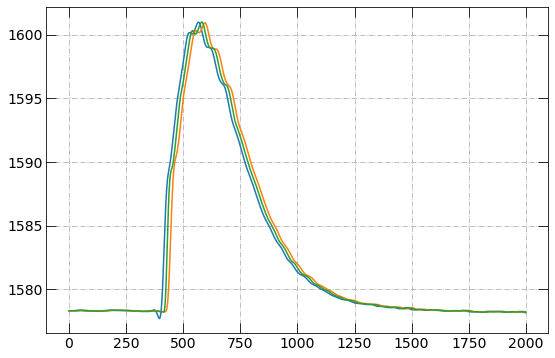

In [67]:
data = mydata['Ch4'].mean(axis=0)
data1 = mydata1['Ch4']


b, a = signal.butter(3, 0.05)
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, data, zi=zi*data[0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
y = signal.filtfilt(b, a, data)
plt.plot(y)
plt.plot(z2)
plt.plot(z)
#plt.xlim(0,400)
#plt.ylim(1578,1580)

plt.show()

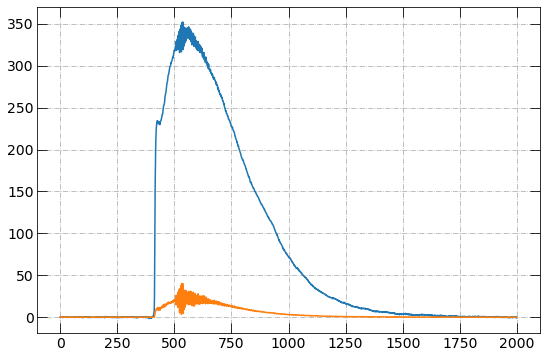

In [81]:
bline = data[0:100].mean()

b, a = signal.butter(3, 0.05)
y = signal.filtfilt(b, a, data-bline)
plt.plot(data1)
plt.plot(data-bline)

#plt.xlim(100,500)
#plt.ylim(-1,1)

plt.show()

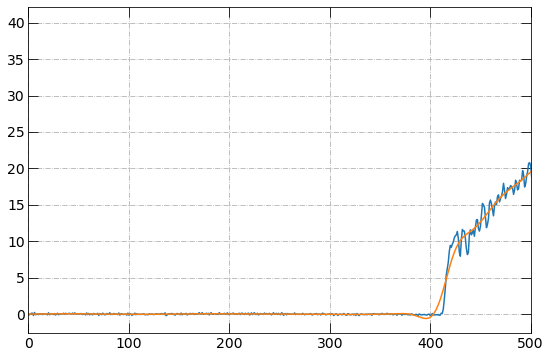

In [69]:
bline = data[0:100].mean()

b, a = signal.butter(3, 0.05)
y = signal.filtfilt(b, a, data-bline)
plt.plot(data-bline)
plt.plot(y)

plt.xlim(0,500)
#plt.ylim(-1,1)

plt.show()